In [206]:
import numpy as np
import sklearn as sk
import pandas as pd
import sklearn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [207]:
df_train = pd.read_csv('train.csv')

In [208]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [209]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

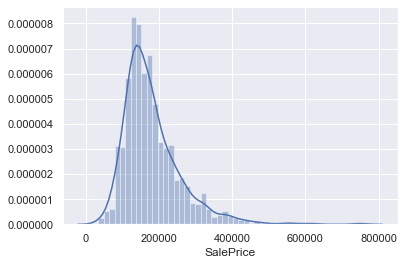

In [210]:
sns.distplot(df_train['SalePrice'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


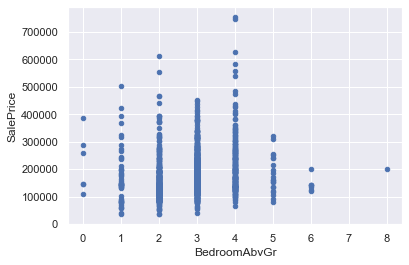

In [211]:
var = 'BedroomAbvGr'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

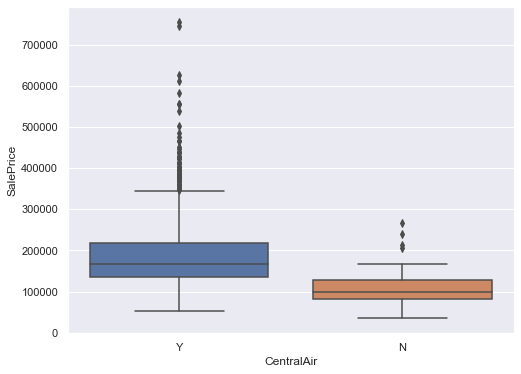

In [212]:
var = 'CentralAir'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)

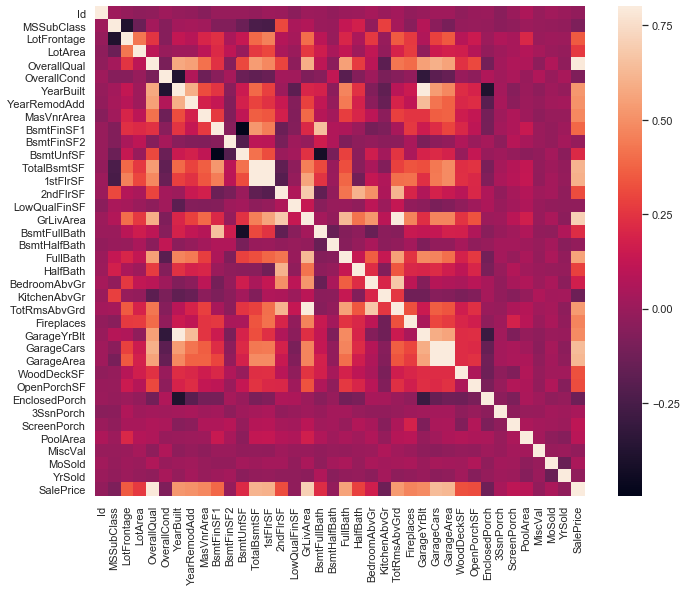

In [213]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

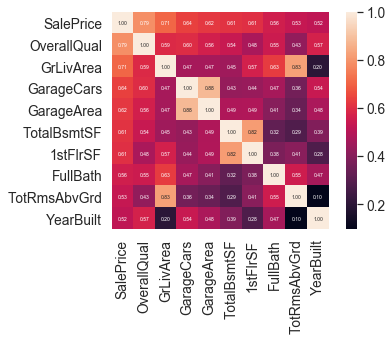

In [214]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size':5}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

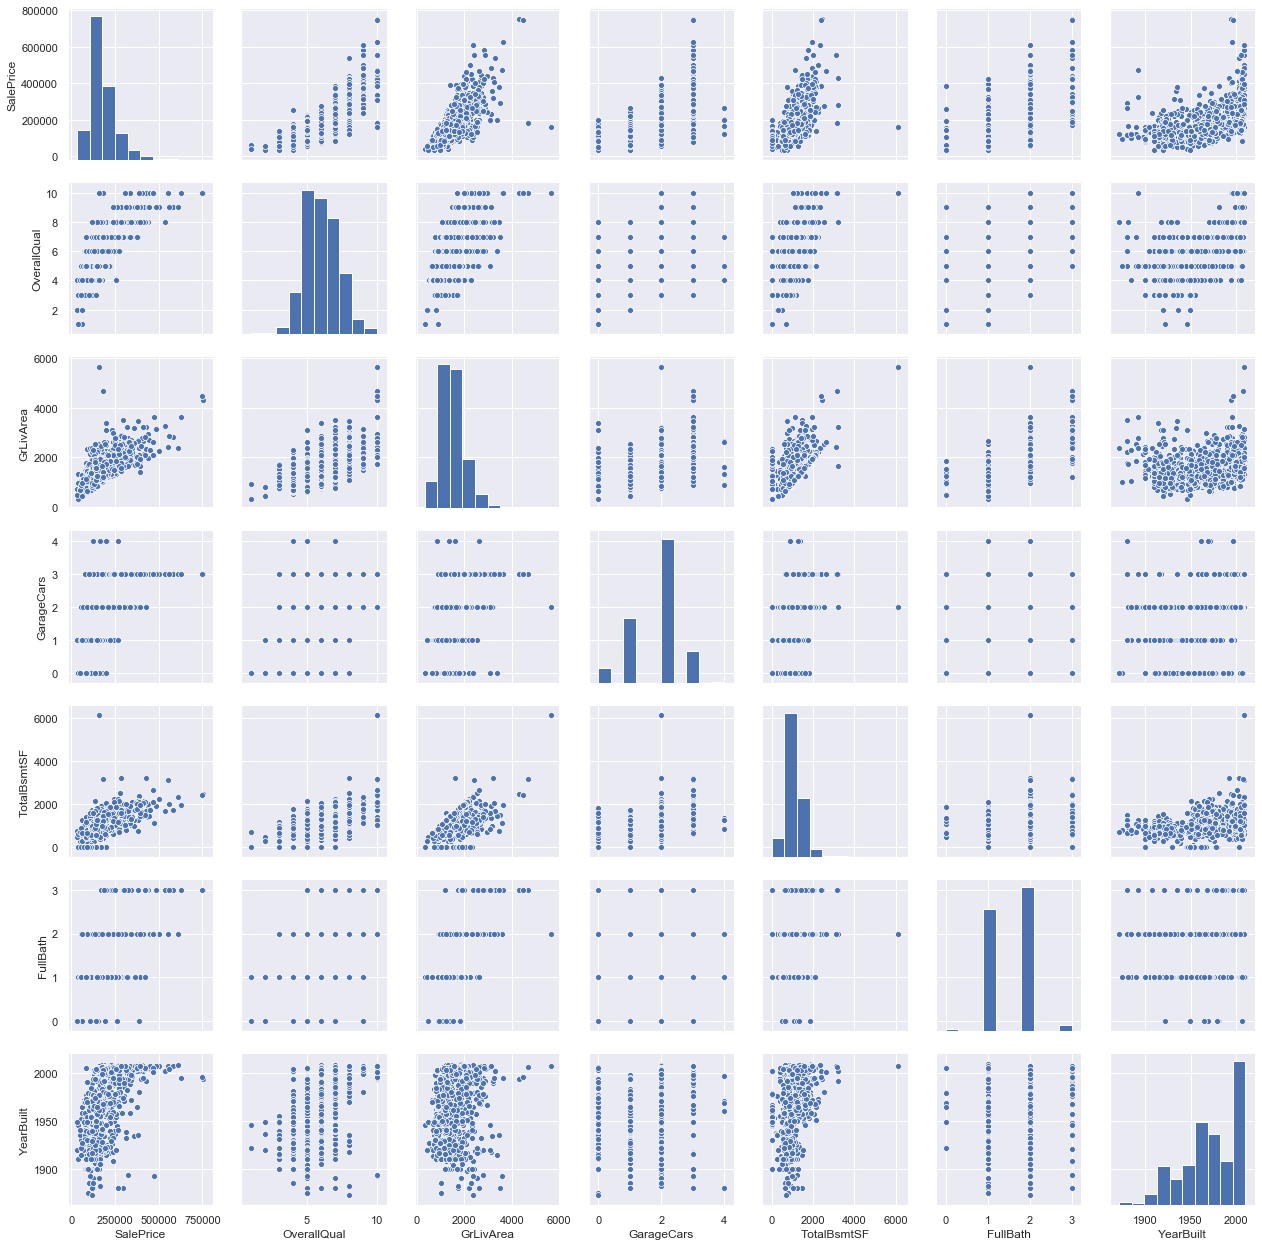

In [215]:
sns.set()
cols=['SalePrice', 
      'OverallQual', 
      'GrLivArea', 
      'GarageCars',
     'TotalBsmtSF',
     'FullBath',
     'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [216]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [217]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [218]:
df_train = df_train.drop(missing_data[missing_data['Total'] > 1].index, 1)


In [219]:
# df_train = df_train.drop(df_train.loc[])
df_train = df_train.drop(df_train[df_train['Electrical'].isnull()].index)

In [220]:
df_train.isnull().sum().max()

0

In [221]:
sales_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [222]:
low = sales_scaled[sales_scaled[:,0].argsort()][:10]
high = sales_scaled[sales_scaled[:,0].argsort()][-10:]
print('low range:')
print(low)
print('high range:')
print(high)

low range:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
high range:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


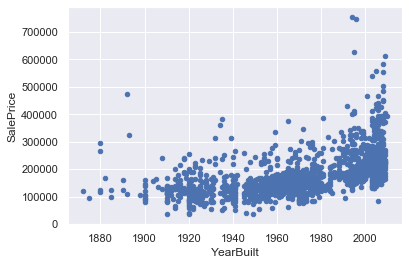

In [223]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [224]:
drop_i = df_train['GrLivArea'].sort_values(ascending=False)[:2].index
df_train = df_train.drop(drop_i)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


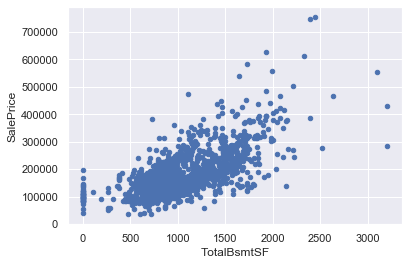

In [225]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

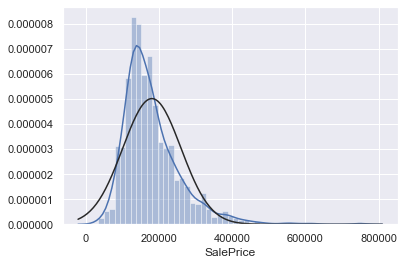

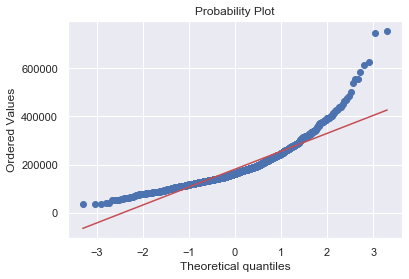

In [226]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [227]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

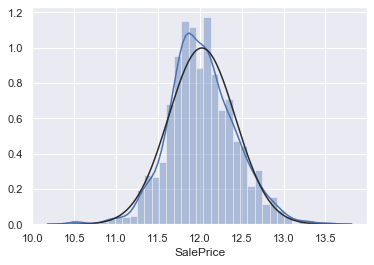

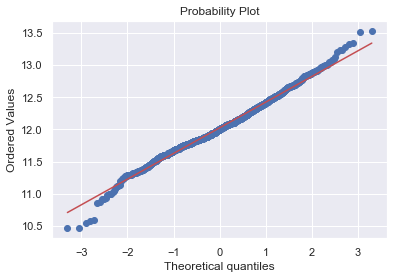

In [228]:
sns.distplot(df_train['SalePrice'], fit=norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

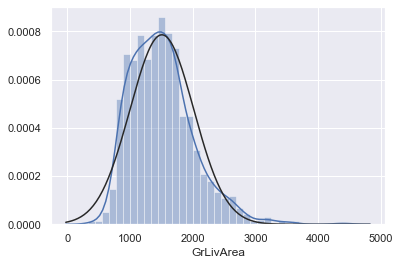

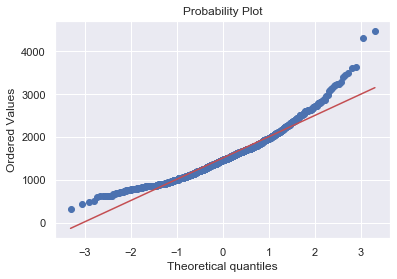

In [229]:
sns.distplot(df_train['GrLivArea'], fit=norm)
plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [230]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

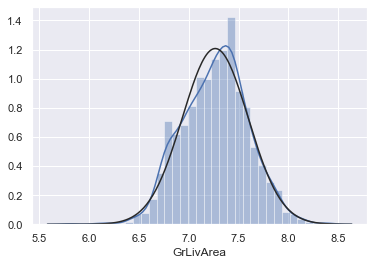

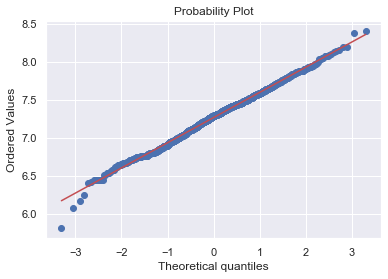

In [231]:
sns.distplot(df_train['GrLivArea'], fit=norm)
plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [233]:
def show_hist(var):
    sns.distplot(df_train[var], fit=norm)
    plt.figure()
    res = stats.probplot(df_train[var], plot=plt)

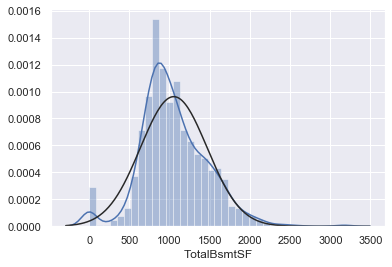

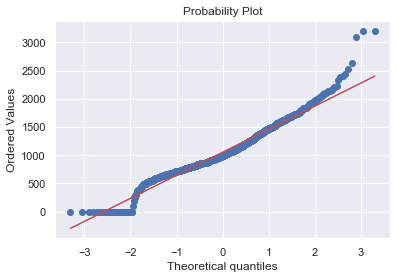

In [234]:
show_hist('TotalBsmtSF')

In [235]:
df_train.loc[df_train['TotalBsmtSF'] > 0, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

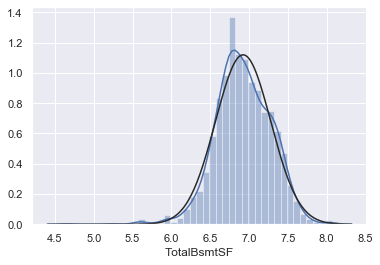

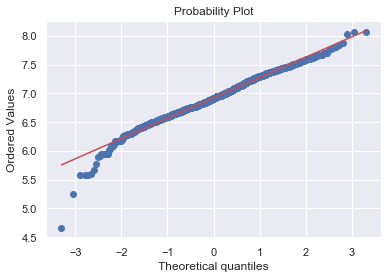

In [236]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

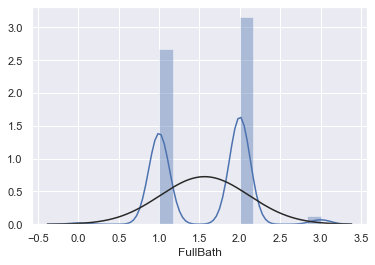

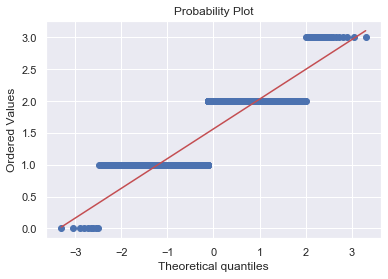

In [239]:
show_hist('FullBath')

In [243]:
train_x = df_train[['SalePrice',
                  'OverallQual',
                  'GrLivArea',
                  'GarageCars',
                  'TotalBsmtSF',
                  'FullBath',
                  'YearBuilt']].copy()
train_x = pd.get_dummies(train_x)
train_x

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,12.247694,7,7.444249,2,6.752270,2,2003
1,12.109011,6,7.140453,2,7.140453,2,1976
2,12.317167,7,7.487734,2,6.824374,2,2001
3,11.849398,7,7.448334,3,6.628041,1,1915
4,12.429216,8,7.695303,3,7.043160,2,2000
5,11.870600,5,7.216709,2,6.679599,1,1993
6,12.634603,8,7.434848,2,7.430114,2,2004
7,12.206073,7,7.644919,2,7.009409,2,1973
8,11.774520,7,7.480992,2,6.858565,2,1931
9,11.678440,5,6.981935,1,6.898715,1,1939
